In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

import ppscore

#Import Library RobustScaler
from sklearn.preprocessing import RobustScaler
#Cluster Model
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score


In [2]:
#load data
data = pd.read_csv('Dataset\AppleStore.csv')
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [3]:
#drop column (Unnamed: 0)
data.drop(["Unnamed: 0"],axis=1,inplace=True)
data.head(2)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

In [5]:
data.shape

(7197, 16)

In [6]:
data.isnull().sum().sum()

0

In [7]:
# all apps has some currency paid 
data['currency'].value_counts()

USD    7197
Name: currency, dtype: int64

In [8]:
# the number of unique values for each column.
data.nunique()

id                  7197
track_name          7195
size_bytes          7107
currency               1
price                 36
rating_count_tot    3185
rating_count_ver    1138
user_rating           10
user_rating_ver       10
ver                 1590
cont_rating            4
prime_genre           23
sup_devices.num       20
ipadSc_urls.num        6
lang.num              57
vpp_lic                2
dtype: int64

## Visualise price distribution of paid apps

In [9]:
data['price'].value_counts()
#here, 4056 free apps
#another apps are paid

0.00      4056
0.99       728
2.99       683
1.99       621
4.99       394
3.99       277
6.99       166
9.99        81
5.99        52
7.99        33
14.99       21
19.99       13
8.99         9
24.99        8
29.99        6
13.99        6
11.99        6
12.99        5
15.99        4
17.99        3
59.99        3
39.99        2
20.99        2
23.99        2
49.99        2
22.99        2
27.99        2
16.99        2
299.99       1
21.99        1
47.99        1
99.99        1
74.99        1
34.99        1
18.99        1
249.99       1
Name: price, dtype: int64

<AxesSubplot: xlabel='price', ylabel='Density'>

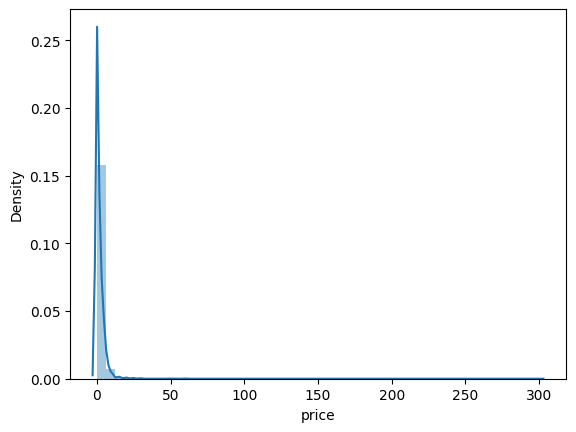

In [10]:
sns.distplot(data.price)

In [11]:
free_apps = data[(data.price==0.00)]
paid_apps = data[(data.price>0)]

In [12]:
free_apps.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281796108,Evernote - stay organized,158578688,USD,0.0,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.0,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.0,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
6,283646709,PayPal - Send and request money safely,227795968,USD,0.0,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1


In [13]:
paid_apps.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
5,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
8,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1
10,284791396,Solitaire by MobilityWare,49618944,USD,4.99,76720,4017,4.5,4.5,4.10.1,4+,Games,38,4,11,1


In [14]:
paid_apps.price.value_counts()

#the number of apps decreases with increasing price

0.99      728
2.99      683
1.99      621
4.99      394
3.99      277
6.99      166
9.99       81
5.99       52
7.99       33
14.99      21
19.99      13
8.99        9
24.99       8
29.99       6
13.99       6
11.99       6
12.99       5
15.99       4
17.99       3
59.99       3
39.99       2
20.99       2
23.99       2
49.99       2
22.99       2
27.99       2
16.99       2
299.99      1
21.99       1
47.99       1
99.99       1
74.99       1
34.99       1
18.99       1
249.99      1
Name: price, dtype: int64

In [15]:
free_apps.price.value_counts()

0.0    4056
Name: price, dtype: int64

<AxesSubplot: xlabel='price', ylabel='Density'>

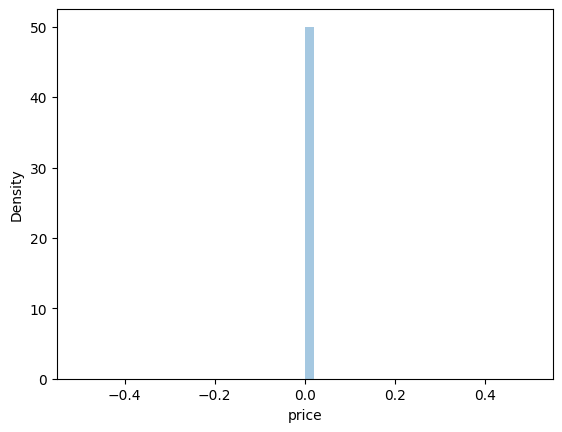

In [16]:
sns.distplot(free_apps['price'])

<AxesSubplot: xlabel='price', ylabel='Density'>

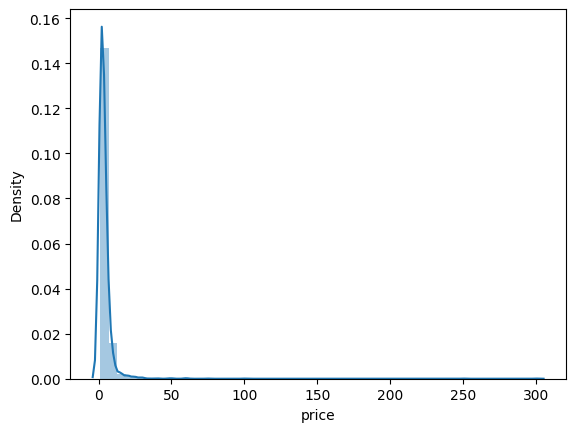

In [17]:
sns.distplot(paid_apps['price'])

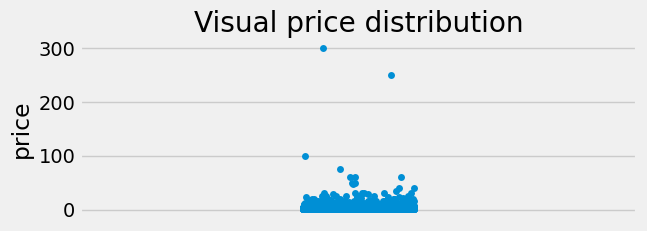

In [18]:
plt.style.use('fivethirtyeight')
plt.Figure(figsize=(6.5,4.3))

plt.subplot(2,1,2)
plt.title("Visual price distribution")
sns.stripplot(data=paid_apps,y='price',jitter=True,orient='h',size=5)
plt.show()

###### from this graph The number of apps that have a price greater than 50 is few compared to before 50 U$D

In [19]:
top_apps = paid_apps[paid_apps.price>50][['track_name','price','prime_genre','user_rating']]

top_apps

,track_name,price,prime_genre,user_rating
115,Proloquo2Go - Symbol-based AAC,249.99,Education,4.0
162,NAVIGON Europe,74.99,Navigation,3.5
1136,Articulation Station Pro,59.99,Education,4.5
1479,LAMP Words For Life,299.99,Education,4.0
2181,Articulation Test Center Pro,59.99,Education,4.5
2568,KNFB Reader,99.99,Productivity,4.5
3238,FineScanner Pro - PDF Document Scanner App + OCR,59.99,Business,4.0


In [20]:
#function for visualization

def visualizer(x,y,plot_type,title,xlabel,ylabel,rotation=False,rotation_value=60,figsize=(15,8)):
    plt.Figure(figsize=figsize)

    if plot_type == "bar":
        sns.barplot(x=x,y=y)
    else:
        sns.countplot(x)
    plt.title(title,fontsize=20)
    plt.xlabel(xlabel,fontsize=18)
    plt.ylabel(ylabel,fontsize=18)
    plt.yticks(fontsize=13)
    if rotation == True:
        plt.xticks(fontsize=13,rotation=rotation-value)    
    plt.show()            

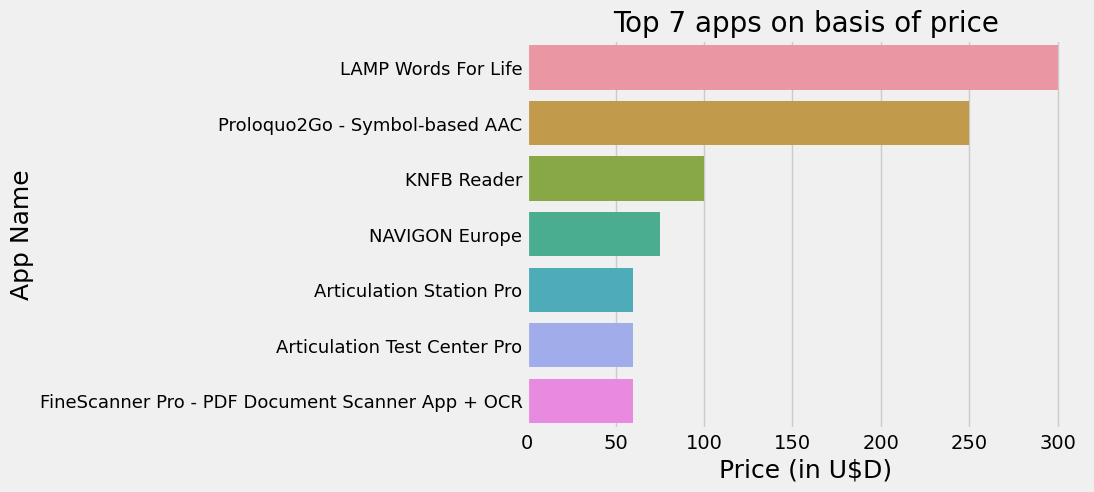

In [21]:
top_apps = top_apps.sort_values('price',ascending=False)

visualizer(top_apps.price,top_apps.track_name,"bar","Top 7 apps on basis of price","Price (in U$D)","App Name")

In [22]:
paid_apps.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
5,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
8,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1
10,284791396,Solitaire by MobilityWare,49618944,USD,4.99,76720,4017,4.5,4.5,4.10.1,4+,Games,38,4,11,1


In [23]:
#sum of all paid apps
sum_paid = paid_apps.price.value_counts().sum()
sum_paid

3141

In [24]:
#sum of all free apps
sum_free = free_apps.price.value_counts().sum()
sum_free

4056

###### How does the price distribution get affected by category

In [25]:
#category of apps
data['prime_genre'].value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

###### Top app category is Games which is 3862 and Entertainment is 535

In [26]:
data.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [27]:
# import pandas as pd

# data = {
#   "Duration": [50, 40, None, None, 90, 20],
#   "Pulse": [109, 140, 110, 125, 138, 170]
# }

# df = pd.DataFrame(data)

# print(df.count())

In [28]:
new_data_cate = data.groupby([data.prime_genre])[['id']].count().reset_index().sort_values('id',ascending=False)
new_data_cate.columns = ['prime_genre','number of apps']

new_data_cate.head(10)

,prime_genre,number of apps
7,Games,3862
4,Entertainment,535
3,Education,453
14,Photo & Video,349
21,Utilities,248
8,Health & Fitness,180
15,Productivity,178
18,Social Networking,167
9,Lifestyle,144
11,Music,138


###### Categories and number of apps in that category

<AxesSubplot: xlabel='number of apps', ylabel='prime_genre'>

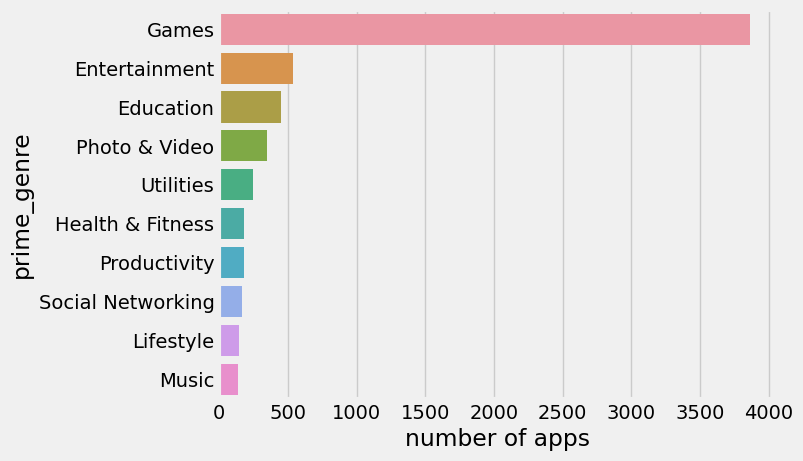

In [29]:
sns.barplot(y='prime_genre',x='number of apps',data=new_data_cate.head(10))

In [30]:
new_data_cate.tail(10)

,prime_genre,number of apps
5,Finance,104
20,Travel,81
13,News,75
22,Weather,72
16,Reference,64
6,Food & Drink,63
1,Business,57
12,Navigation,46
10,Medical,23
2,Catalogs,10


<AxesSubplot: xlabel='number of apps', ylabel='prime_genre'>

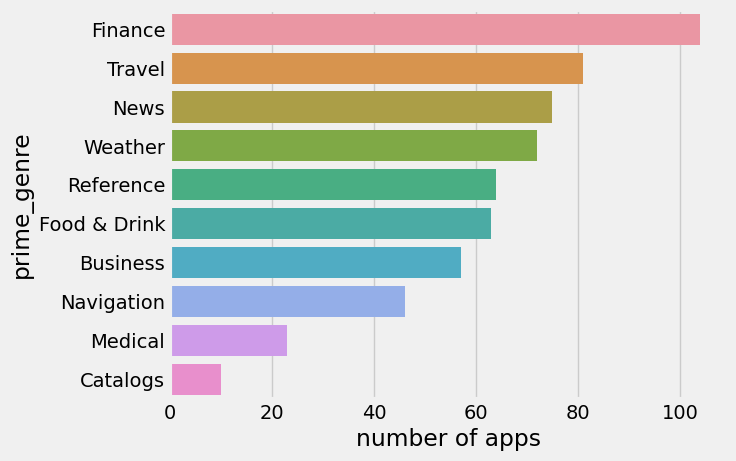

In [31]:
sns.barplot(x='number of apps',y='prime_genre',data=new_data_cate.tail(10))

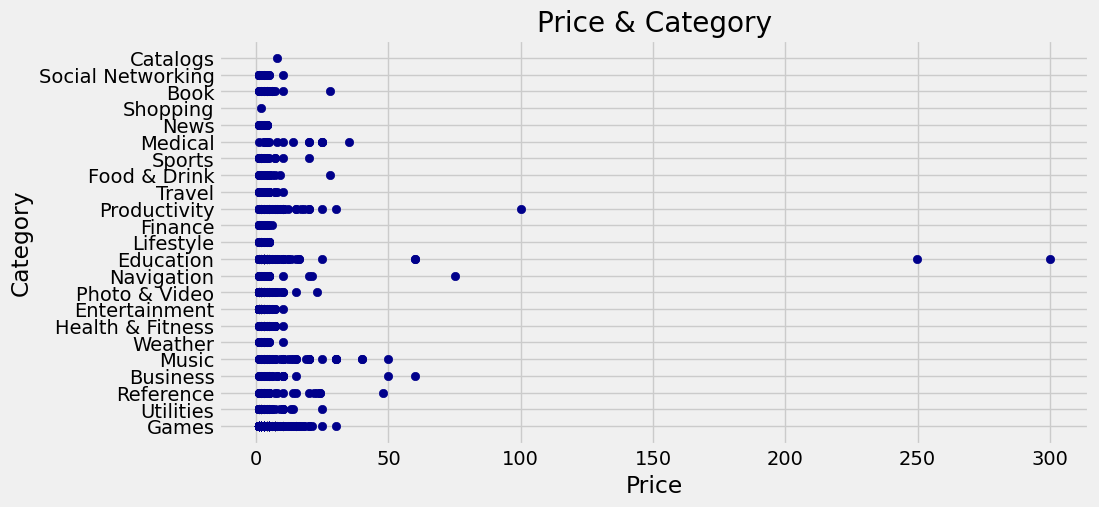

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(x=paid_apps.price , y=paid_apps.prime_genre,c='DarkBlue')
plt.title('Price & Category')
plt.xlabel('Price')
plt.ylabel('Category')
plt.show()

###### Education apps has a higher price
###### Shopping apps has a lower price

## Paid Apps v/s Free Apps

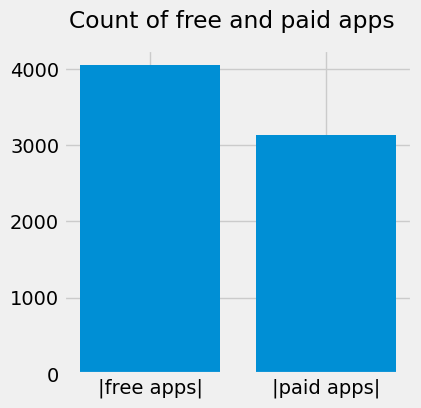

In [33]:
names = ['|free apps|','|paid apps|']
values = [sum_free,sum_paid]
plt.figure(figsize=(4,4))
plt.suptitle("Count of free and paid apps")
plt.bar(names,values)
plt.show()

In [34]:
print(f"Number of categories in free apps : {len(free_apps.prime_genre.value_counts())}")
print(f"Number of categories in paid apps : {len(paid_apps.prime_genre.value_counts())}")

Number of categories in free apps : 23
Number of categories in paid apps : 23


In [35]:
free = free_apps.prime_genre.value_counts().sort_index().to_frame()
paid = paid_apps.prime_genre.value_counts().sort_index().to_frame()
total = data.prime_genre.value_counts().sort_index().to_frame()
free.columns = ['free']
paid.columns = ['paid']
total.columns = ['total']
table = free.join(paid).join(total)
table['%free'] = table.free*100/table.total
table['%paid'] = table.paid*100/table.total
table

,free,paid,total,%free,%paid
Book,66,46,112,58.928571,41.071429
Business,20,37,57,35.087719,64.912281
Catalogs,9,1,10,90.000000,10.000000
Education,132,321,453,29.139073,70.860927
Entertainment,334,201,535,62.429907,37.570093
Finance,84,20,104,80.769231,19.230769
Food & Drink,43,20,63,68.253968,31.746032
Games,2257,1605,3862,58.441222,41.558778
Health & Fitness,76,104,180,42.222222,57.777778
Lifestyle,94,50,144,65.277778,34.722222


In [36]:
# for pie chart
pies = table[["%free","%paid"]].head()
pies.columns = ["free apps","paid apps"]

<Figure size 1500x1000 with 0 Axes>

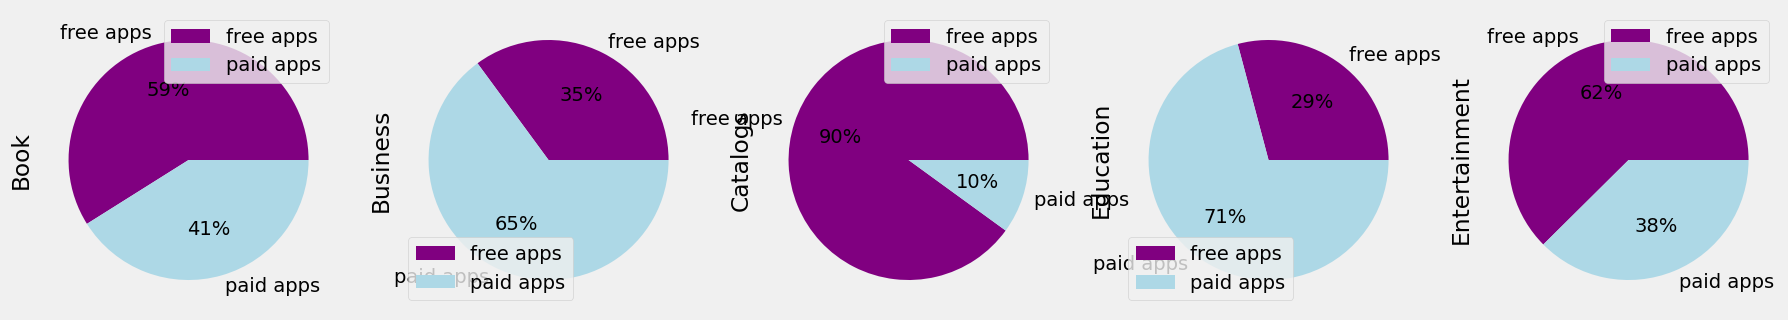

In [37]:
plt.figure(figsize=(15,10))
pies.T.plot.pie(subplots=True,figsize=(20,4),colors=['#800080','#ADD8E6'],autopct = '%1.0f%%')    
plt.show()    

In [38]:
data[data['rating_count_tot']== data.rating_count_tot.max()]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
16,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1


Text(0.5, 1.0, 'Distribution of app rating')

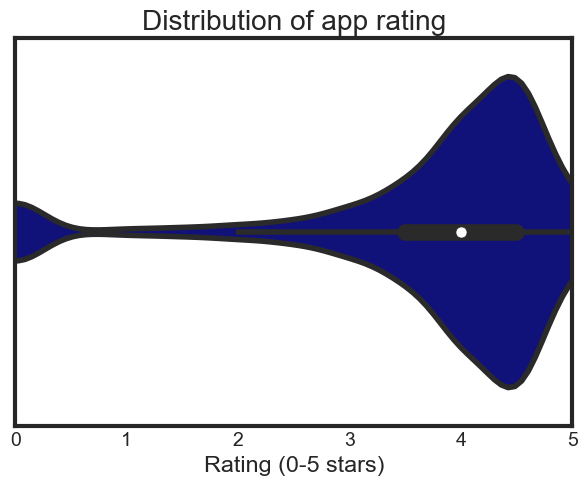

In [39]:
sns.set_style('white')
sns.violinplot(x=paid_apps.user_rating ,color='#00008B')
plt.xlim(0,5)
plt.xlabel('Rating (0-5 stars)')
plt.title('Distribution of app rating')

In [40]:
paid_apps.cont_rating.value_counts()

4+     1967
9+      549
12+     450
17+     175
Name: cont_rating, dtype: int64

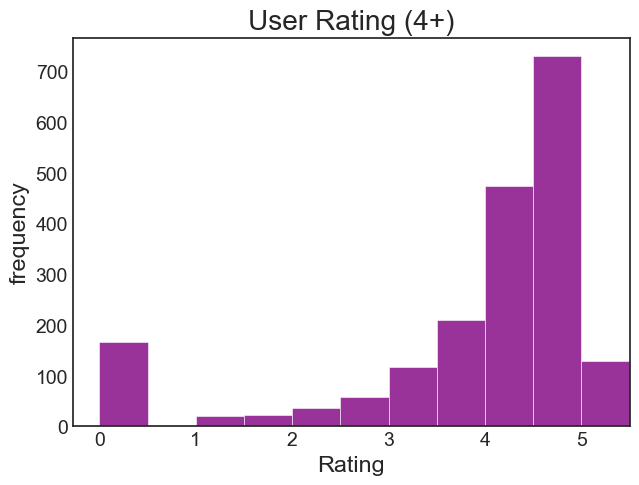

In [41]:
bins = (0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5)
plt.style.use('seaborn-white')
plt.hist(paid_apps[paid_apps['cont_rating']=='4+']['user_rating'],alpha=0.8,bins=bins,color='purple')
# plt.xticks()
plt.title('User Rating (4+)')
plt.xlabel('Rating')
plt.ylabel("frequency")
_=plt.xlim(right=5.5)

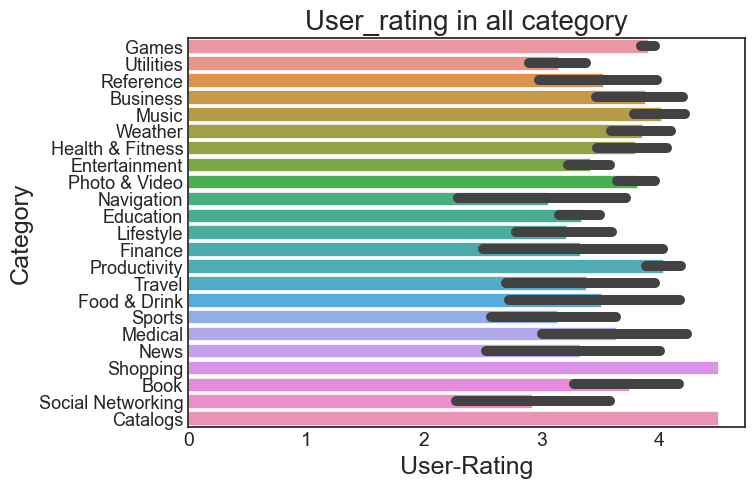

In [42]:
visualizer(paid_apps.user_rating,paid_apps.prime_genre,"bar","User_rating in all category","User-Rating","Category")


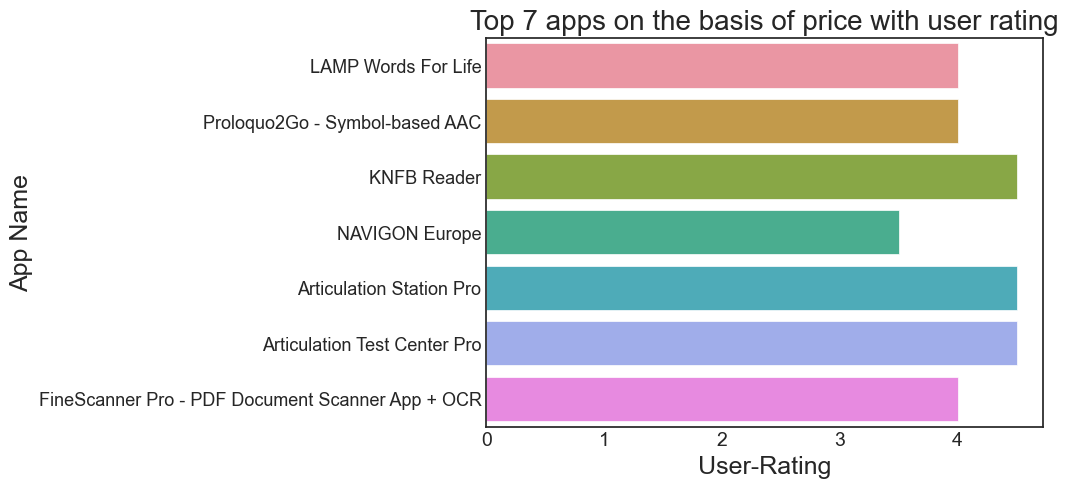

In [43]:
top_apps = top_apps.sort_values('price',ascending=False)

visualizer(top_apps.user_rating , top_apps.track_name,'bar','Top 7 apps on the basis of price with user rating','User-Rating','App Name' )

In [44]:
lower_apps = paid_apps[paid_apps.price <=50][['track_name','price','prime_genre','user_rating']]
lower_apps.head()

,track_name,price,prime_genre,user_rating
0,PAC-MAN Premium,3.99,Games,4.0
5,Shanghai Mahjong,0.99,Games,4.0
8,PCalc - The Best Calculator,9.99,Utilities,4.5
9,Ms. PAC-MAN,3.99,Games,4.0
10,Solitaire by MobilityWare,4.99,Games,4.5


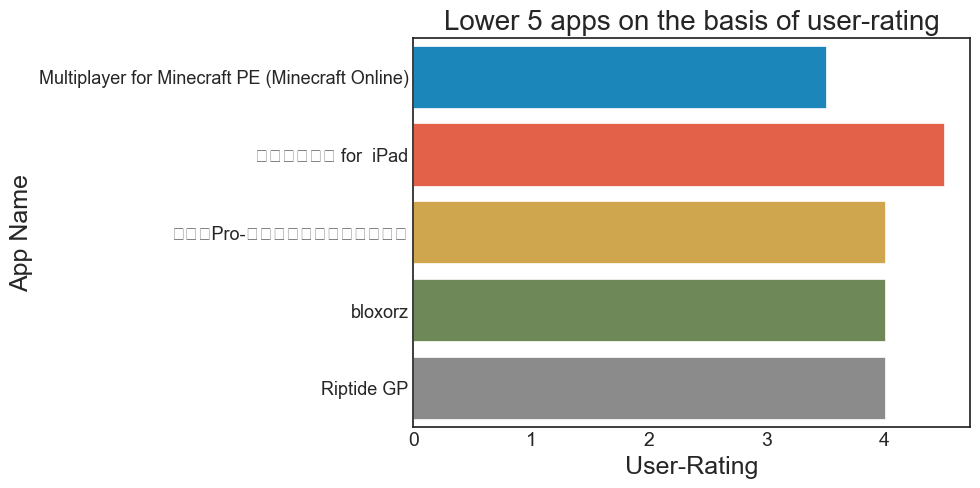

In [45]:
lower_apps = lower_apps.sort_values('price',ascending=True)
lower5 = lower_apps.head()
visualizer(lower5.user_rating,lower5.track_name,"bar","Lower 5 apps on the basis of user-rating","User-Rating","App Name")

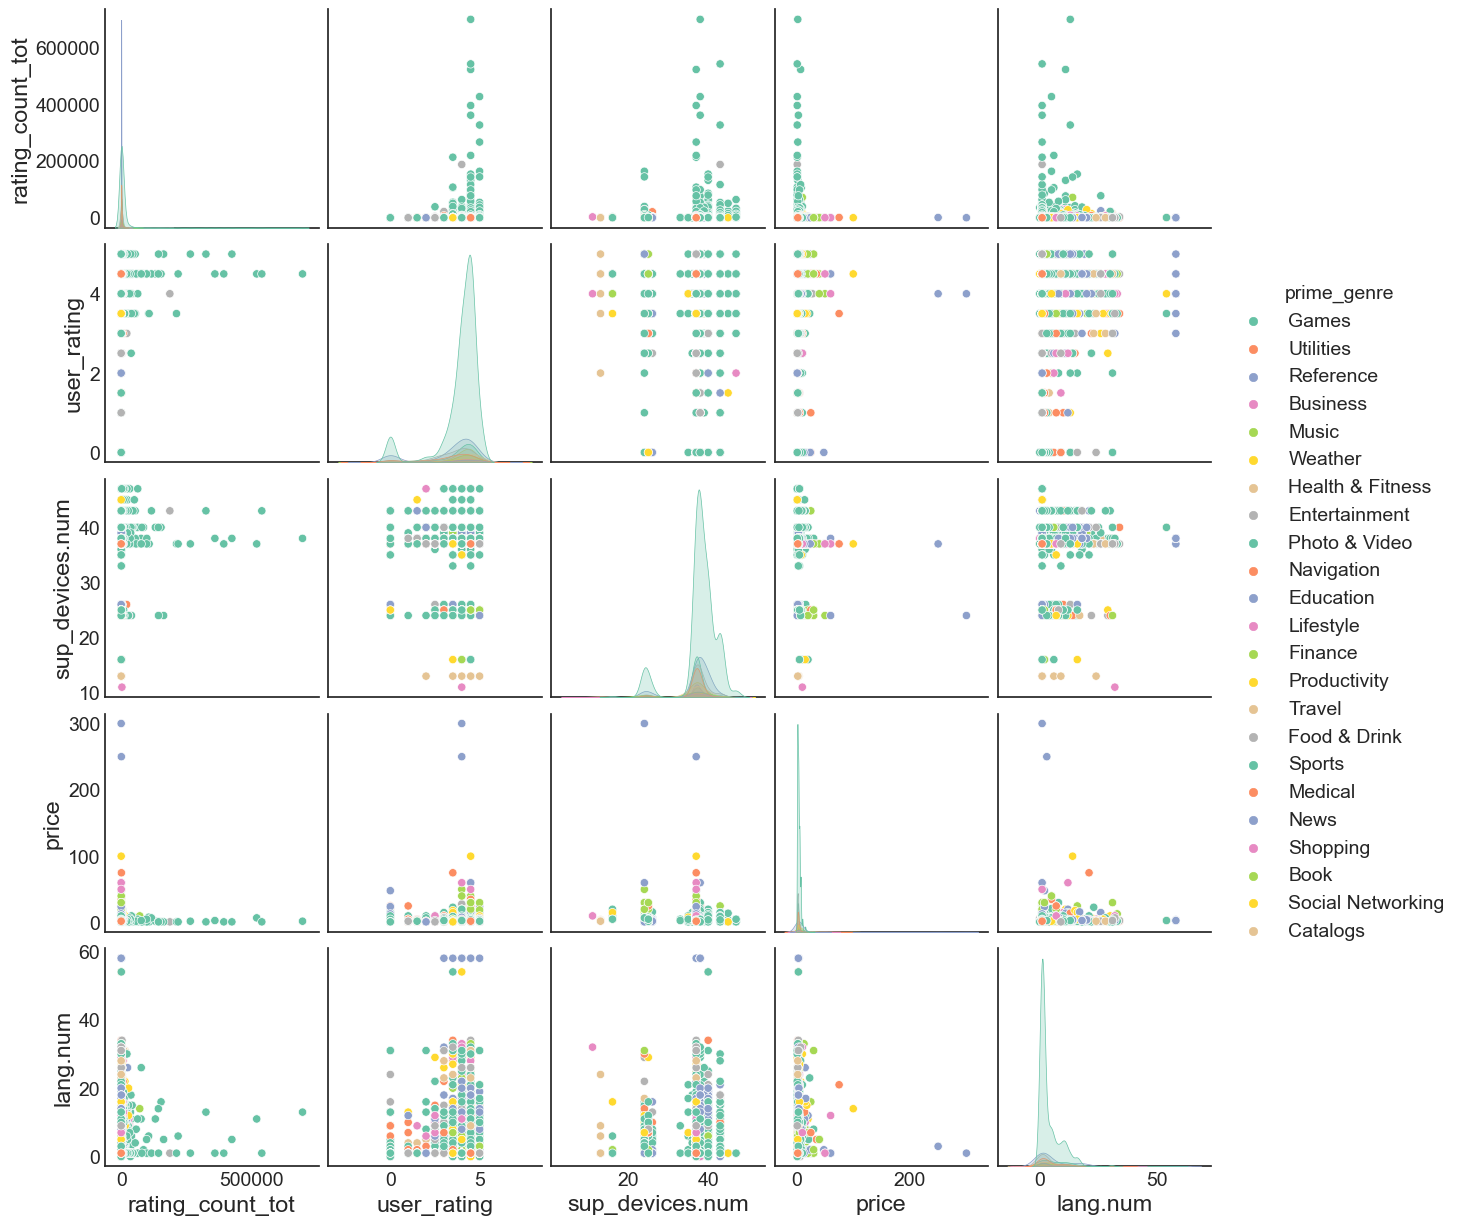

In [46]:
num_col = paid_apps[['rating_count_tot','user_rating','sup_devices.num','price','lang.num','prime_genre']]
sns.pairplot(data=num_col,hue='prime_genre',palette='Set2')

## As the size of the app increases do they get pricer?

(0.0, 4227238656.0)

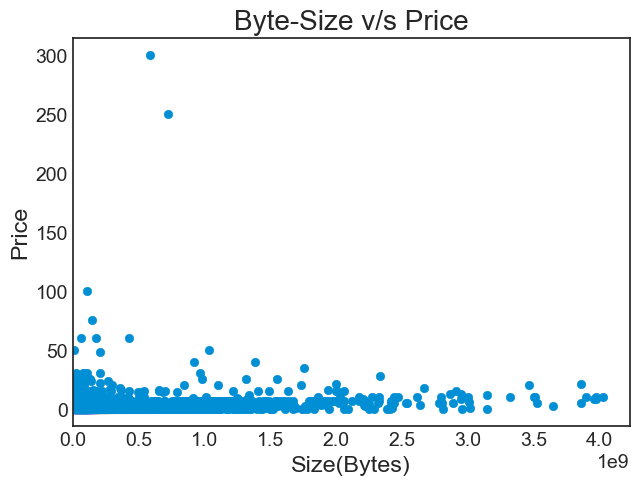

In [47]:
plt.style.use('seaborn-white')
plt.scatter(data.size_bytes,data.price)
plt.title("Byte-Size v/s Price")
plt.xlabel('Size(Bytes)')
plt.ylabel("Price")
plt.xlim(0)

###### Size of app is not correlated with price
###### Here we show that if the size is big ,price is low
###### The value of app to the user isn't necessarly related to size

### How the apps distributed category wise , Splitting by paid category

In [48]:
grp = paid_apps.groupby('prime_genre')
x = grp.user_rating.agg(np.mean)
y = grp.price.agg(np.sum)
z = grp.user_rating_ver.agg(np.mean)
print(x,"\n\n",y,"\n\n",z)

prime_genre
Book                 3.739130
Business             3.878378
Catalogs             4.500000
Education            3.331776
Entertainment        3.410448
Finance              3.325000
Food & Drink         3.500000
Games                3.904984
Health & Fitness     3.788462
Lifestyle            3.210000
Medical              3.633333
Music                4.014085
Navigation           3.057692
News                 3.323529
Photo & Video        3.807692
Productivity         4.030172
Reference            3.522727
Shopping             4.500000
Social Networking    2.916667
Sports               3.128571
Travel               3.380000
Utilities            3.140288
Weather              3.853659
Name: user_rating, dtype: float64 

 prime_genre
Book                  200.54
Business              291.63
Catalogs                7.99
Education            1824.79
Entertainment         475.99
Finance                43.80
Food & Drink           97.80
Games                5533.95
Health & Fitness 

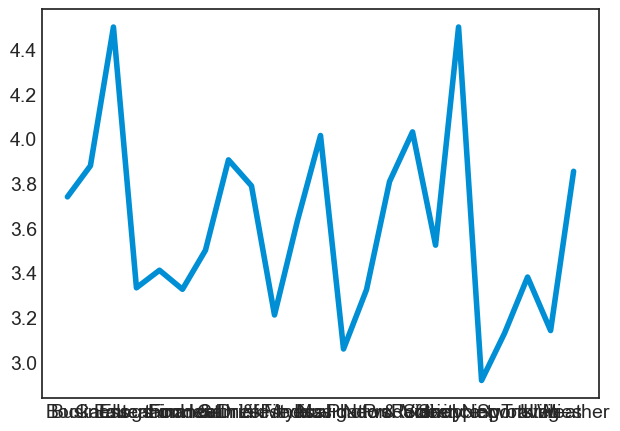

In [49]:
#plotting x
plt.plot(x)

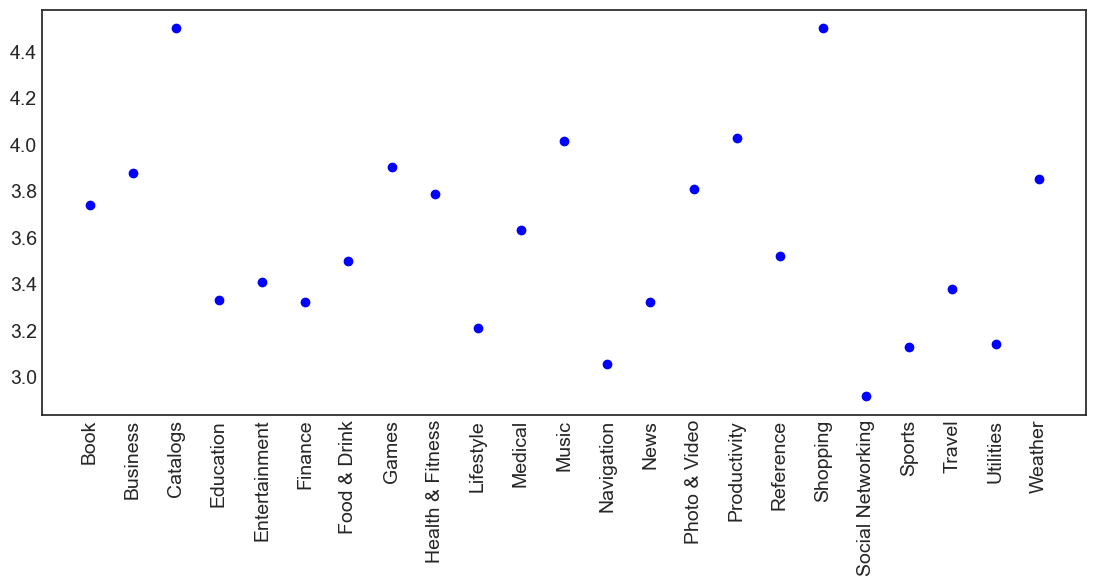

In [50]:
# Need to expand
plt.figure(figsize=(12,5))
plt.plot(x,'bo')
plt.xticks(rotation=90)
plt.show()

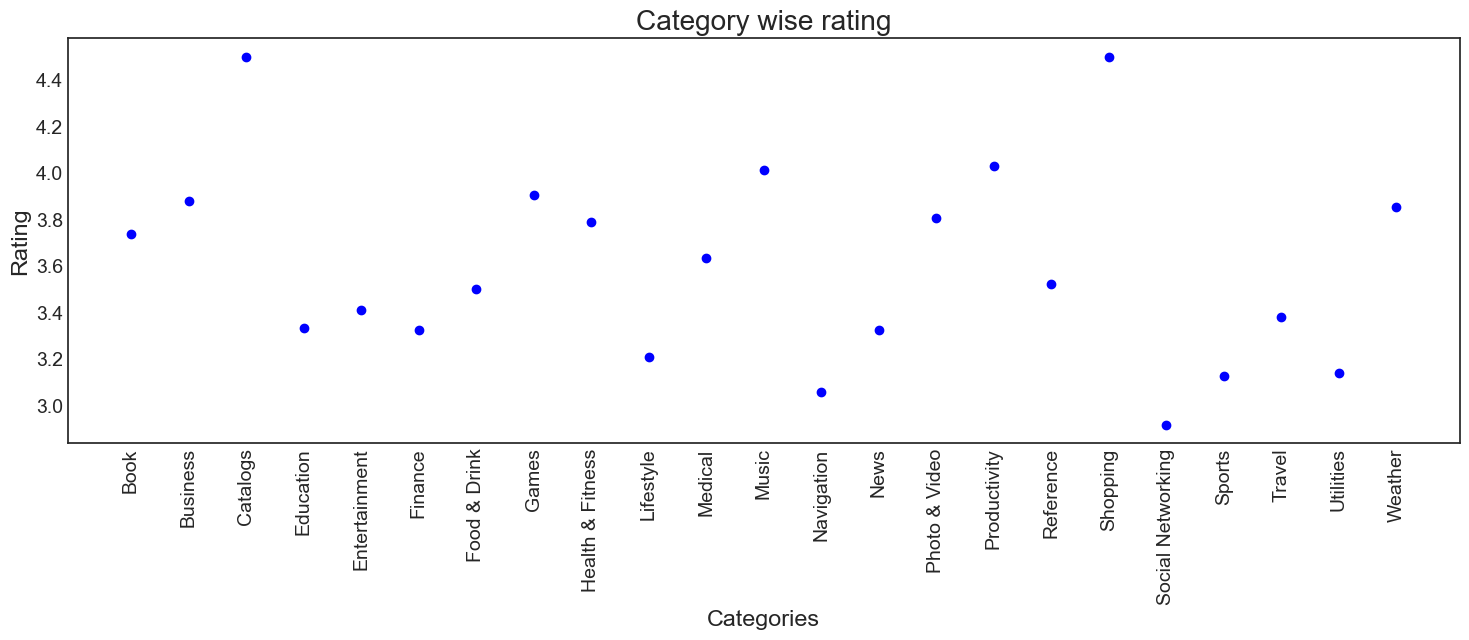

In [51]:
#for x

plt.figure(figsize=(16,5))
plt.plot(x,'bo')
plt.xticks(rotation=90)
plt.title('Category wise rating')
plt.xlabel('Categories')
plt.ylabel('Rating')
plt.show()

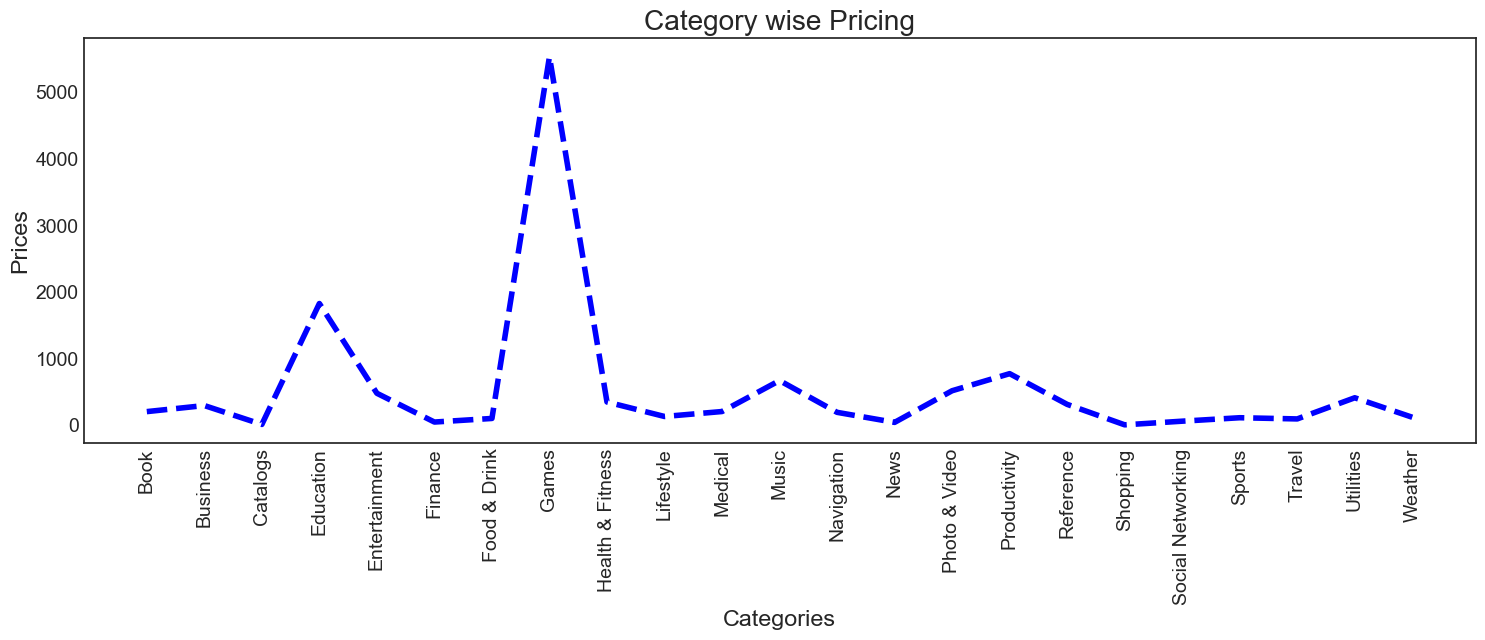

In [52]:
# for y

plt.figure(figsize=(16,5))
plt.plot(y,'b--')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Categories')
plt.ylabel('Prices')
plt.show()

In [53]:
# reducing the number of categories to 5 categories

s = data.prime_genre.value_counts().index[:4]

def categ(x):
    if x in s:
        return x
    else:
        return "Others"
data['broad_genre'] = data.prime_genre.apply(lambda x: categ(x))    

In [54]:
data['broad_genre'].value_counts()

Games            3862
Others           1998
Entertainment     535
Education         453
Photo & Video     349
Name: broad_genre, dtype: int64

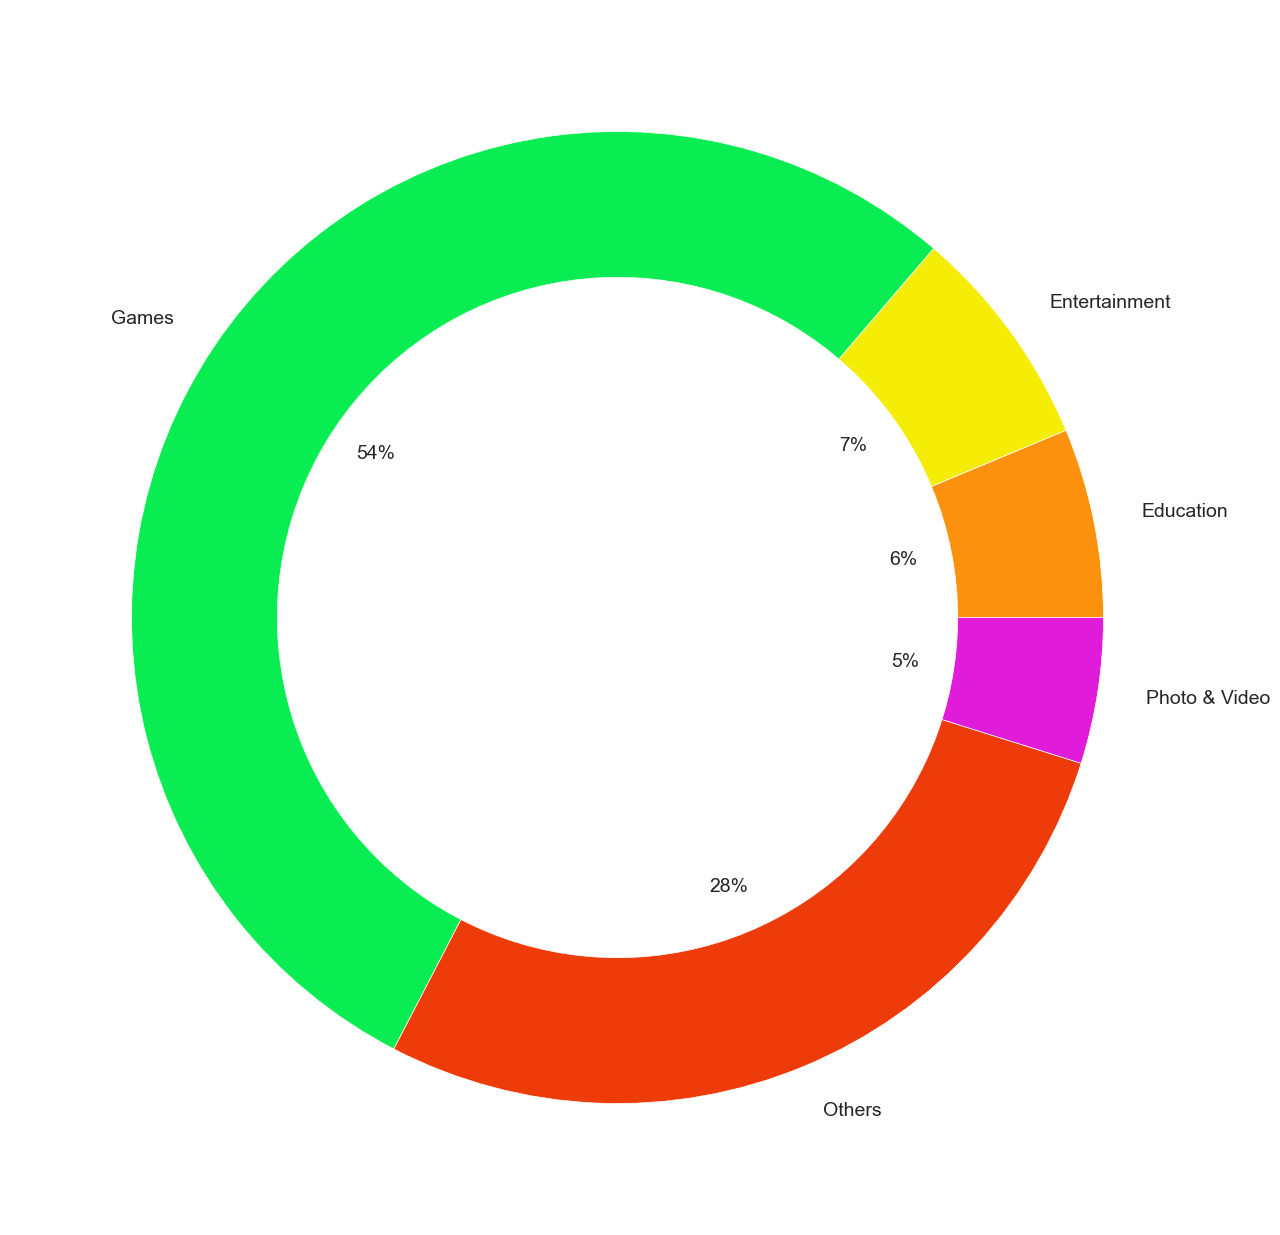

In [55]:
colouring = ['#fc910d','#f5ed05','#09ed52','#ed3b09','#e01bda']
plt.figure(figsize=(15,15))
label_names = data.broad_genre.value_counts().sort_index().index
size = data.broad_genre.value_counts().sort_index().tolist()

my_circle = plt.Circle( (0,0) , 0.7 , color='white')
plt.pie(size, labels=label_names, colors=colouring ,autopct="%1.0f%%")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [56]:
free = data[data.price==0].broad_genre.value_counts().sort_index().to_frame()
paid = data[data.price>0].broad_genre.value_counts().sort_index().to_frame()
total = data.broad_genre.value_counts().sort_index().to_frame()

free.columns=['free']
paid.columns=['paid']
total.columns=['total']
category = free.join(paid).join(total)

category['free %'] = category.free*100 / category.total
category['paid %'] = category.paid*100 / category.total
category

,free,paid,total,free %,paid %
Education,132,321,453,29.139073,70.860927
Entertainment,334,201,535,62.429907,37.570093
Games,2257,1605,3862,58.441222,41.558778
Others,1166,832,1998,58.358358,41.641642
Photo & Video,167,182,349,47.851003,52.148997


<Figure size 1500x1500 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

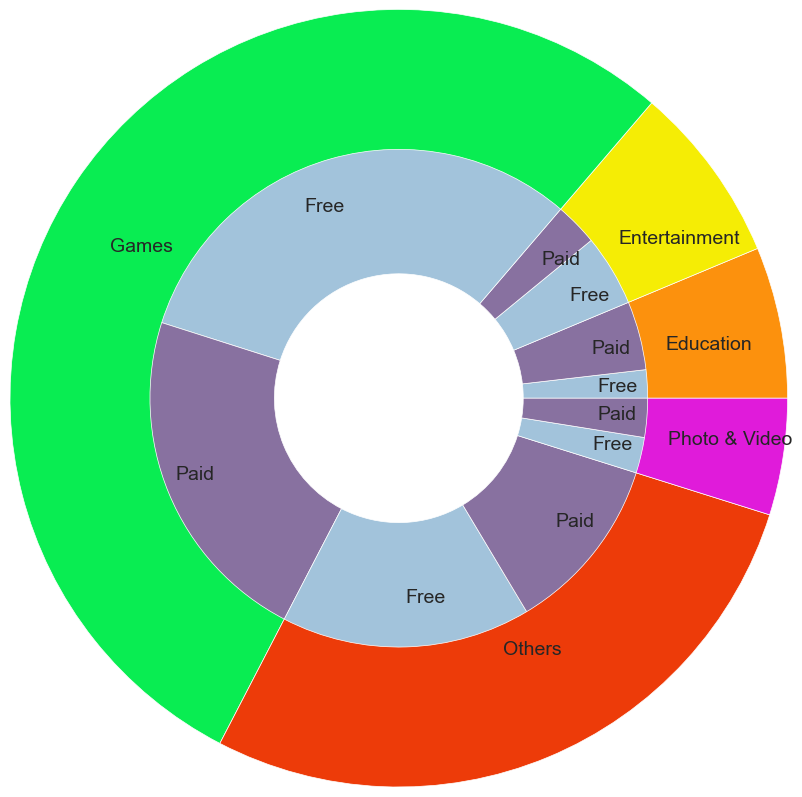

In [57]:
plt.figure(figsize=(15,15))
f = pd.DataFrame(index=np.arange(0,10,2),data=category['free'].values,columns=['num']) #index=(0,2,4,6,8)
p = pd.DataFrame(index=np.arange(1,11,2),data=category['paid'].values,columns=['num']) #index=(1,3,5,7,9)
final = pd.concat([f,p],names=['labels']).sort_index()

plt.figure(figsize=(25,25))
group_names=data.broad_genre.value_counts().sort_index().index
group_size =data.broad_genre.value_counts().sort_index().to_list()
h = ['Free','Paid']
subgroups_names = 5*h
sub=['#A2C3DB','#8871A0']
subcolours = 5*sub
subgroup_size = final.num.tolist()
# subgroup_size

# 1st ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie , _ = ax.pie(group_size,radius=2.5,labels=group_names,colors=colouring,labeldistance=0.7)
plt.setp( mypie,width=1.2,edgecolor='white')

#2nd ring (inside)
mypie2,_ = ax.pie(subgroup_size,radius=1.6,labels=subgroups_names,colors=subcolours,labeldistance=0.8)
plt.setp(mypie2,width=0.8,edgecolor='white')
plt.margins(0,0)

plt.show()

array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>]],
      dtype=object)

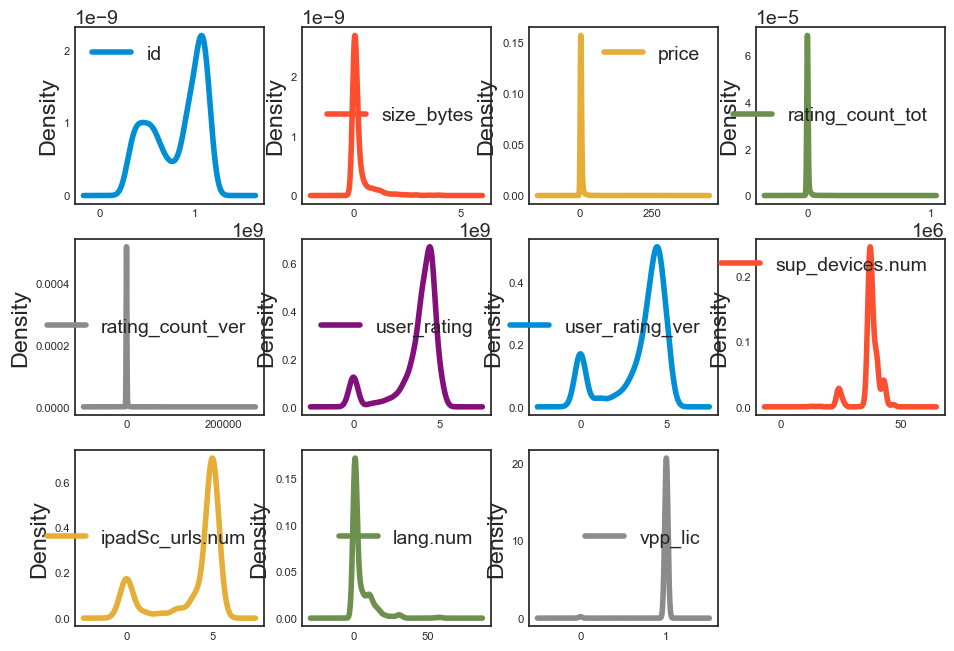

In [58]:
paid_apps.plot(kind='density',subplots=True,layout=(4,4), fontsize=8, figsize=(10,10),sharex=False )

# Feature Engineering

In [59]:
from sklearn.preprocessing import LabelEncoder
USD_label= LabelEncoder()
data.currency = USD_label.fit_transform(data.currency)

In [60]:
data.drop(['broad_genre'],axis=1,inplace=True)

In [61]:
data.drop(['currency'],axis=1,inplace=True)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   price             7197 non-null   float64
 4   rating_count_tot  7197 non-null   int64  
 5   rating_count_ver  7197 non-null   int64  
 6   user_rating       7197 non-null   float64
 7   user_rating_ver   7197 non-null   float64
 8   ver               7197 non-null   object 
 9   cont_rating       7197 non-null   object 
 10  prime_genre       7197 non-null   object 
 11  sup_devices.num   7197 non-null   int64  
 12  ipadSc_urls.num   7197 non-null   int64  
 13  lang.num          7197 non-null   int64  
 14  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 843.5+ KB


In [63]:
# encoding object column int
track_name_LABEL = LabelEncoder()
data.track_name = track_name_LABEL.fit_transform(data.track_name)

In [64]:
ver_label = LabelEncoder()
data.ver = ver_label.fit_transform(data.ver)

prime_genre_label = LabelEncoder()
data.prime_genre = prime_genre_label.fit_transform(data.prime_genre)

cont_rating_label = LabelEncoder()
data.cont_rating = cont_rating_label.fit_transform(data.cont_rating)

In [65]:
data.head()

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,3676,100788224,3.99,21292,26,4.0,4.5,1379,2,7,38,5,10,1
1,281796108,1664,158578688,0.00,161065,26,4.0,3.5,1514,2,15,37,5,23,1
2,281940292,5870,100524032,0.00,188583,2822,3.5,4.5,1210,2,22,37,5,3,1
3,282614216,6132,128512000,0.00,262241,649,4.0,4.5,1236,0,17,37,5,9,1
4,282935706,527,92774400,0.00,985920,5320,4.5,5.0,1472,2,16,37,5,45,1


In [66]:
data.drop(['id'],axis=1,inplace=True)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        7197 non-null   int32  
 1   size_bytes        7197 non-null   int64  
 2   price             7197 non-null   float64
 3   rating_count_tot  7197 non-null   int64  
 4   rating_count_ver  7197 non-null   int64  
 5   user_rating       7197 non-null   float64
 6   user_rating_ver   7197 non-null   float64
 7   ver               7197 non-null   int32  
 8   cont_rating       7197 non-null   int32  
 9   prime_genre       7197 non-null   int32  
 10  sup_devices.num   7197 non-null   int64  
 11  ipadSc_urls.num   7197 non-null   int64  
 12  lang.num          7197 non-null   int64  
 13  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int32(4), int64(7)
memory usage: 674.8 KB


In [68]:
# about data
data.describe()

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,3597.221203,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,525.092539,1.729749,8.580937,37.361817,3.707100,5.434903,0.993053
std,2077.028362,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,433.974761,0.890266,4.865651,3.737715,1.986005,7.919593,0.083066
min,0.000000,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,1799.000000,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,118.000000,2.000000,7.000000,37.000000,3.000000,1.000000,1.000000
50%,3597.000000,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,390.000000,2.000000,7.000000,37.000000,5.000000,1.000000,1.000000
75%,5396.000000,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,848.000000,2.000000,9.000000,38.000000,5.000000,8.000000,1.000000
max,7194.000000,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,1589.000000,3.000000,22.000000,47.000000,5.000000,75.000000,1.000000


In [69]:
D_corr = data.corr()
D_corr.style.background_gradient(cmap="Purples")

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
track_name,1.000000,-0.049030,-0.039913,-0.043531,-0.015036,-0.303899,-0.300058,0.031308,-0.068895,0.006130,0.021808,-0.145207,-0.081477,-0.030828
size_bytes,-0.049030,1.000000,0.182392,0.004486,0.006337,0.066256,0.086075,-0.139159,-0.044634,-0.134438,-0.118347,0.152697,0.004614,-0.150418
price,-0.039913,0.182392,1.000000,-0.039044,-0.018012,0.046601,0.025173,-0.010842,0.033551,-0.017413,-0.115361,0.066100,-0.006713,-0.029942
rating_count_tot,-0.043531,0.004486,-0.039044,1.000000,0.163645,0.083310,0.088744,0.142502,-0.016398,0.039188,0.008832,0.015734,0.137675,-0.000982
rating_count_ver,-0.015036,0.006337,-0.018012,0.163645,1.000000,0.068754,0.077840,-0.000678,-0.016948,0.011090,0.037951,0.024333,0.013287,0.006460
user_rating,-0.303899,0.066256,0.046601,0.083310,0.068754,1.000000,0.774140,0.113104,0.064212,0.000975,-0.042451,0.265671,0.170976,0.069816
user_rating_ver,-0.300058,0.086075,0.025173,0.088744,0.077840,0.774140,1.000000,-0.003986,0.090602,-0.033246,-0.018901,0.275737,0.175580,0.050094
ver,0.031308,-0.139159,-0.010842,0.142502,-0.000678,0.113104,-0.003986,1.000000,-0.110565,0.274150,-0.102288,-0.070954,0.137482,0.031991
cont_rating,-0.068895,-0.044634,0.033551,-0.016398,-0.016948,0.064212,0.090602,-0.110565,1.000000,-0.052295,-0.047829,0.084674,0.024418,0.055412
prime_genre,0.006130,-0.134438,-0.017413,0.039188,0.011090,0.000975,-0.033246,0.274150,-0.052295,1.000000,-0.073675,-0.198290,0.104579,-0.028522


<AxesSubplot: >

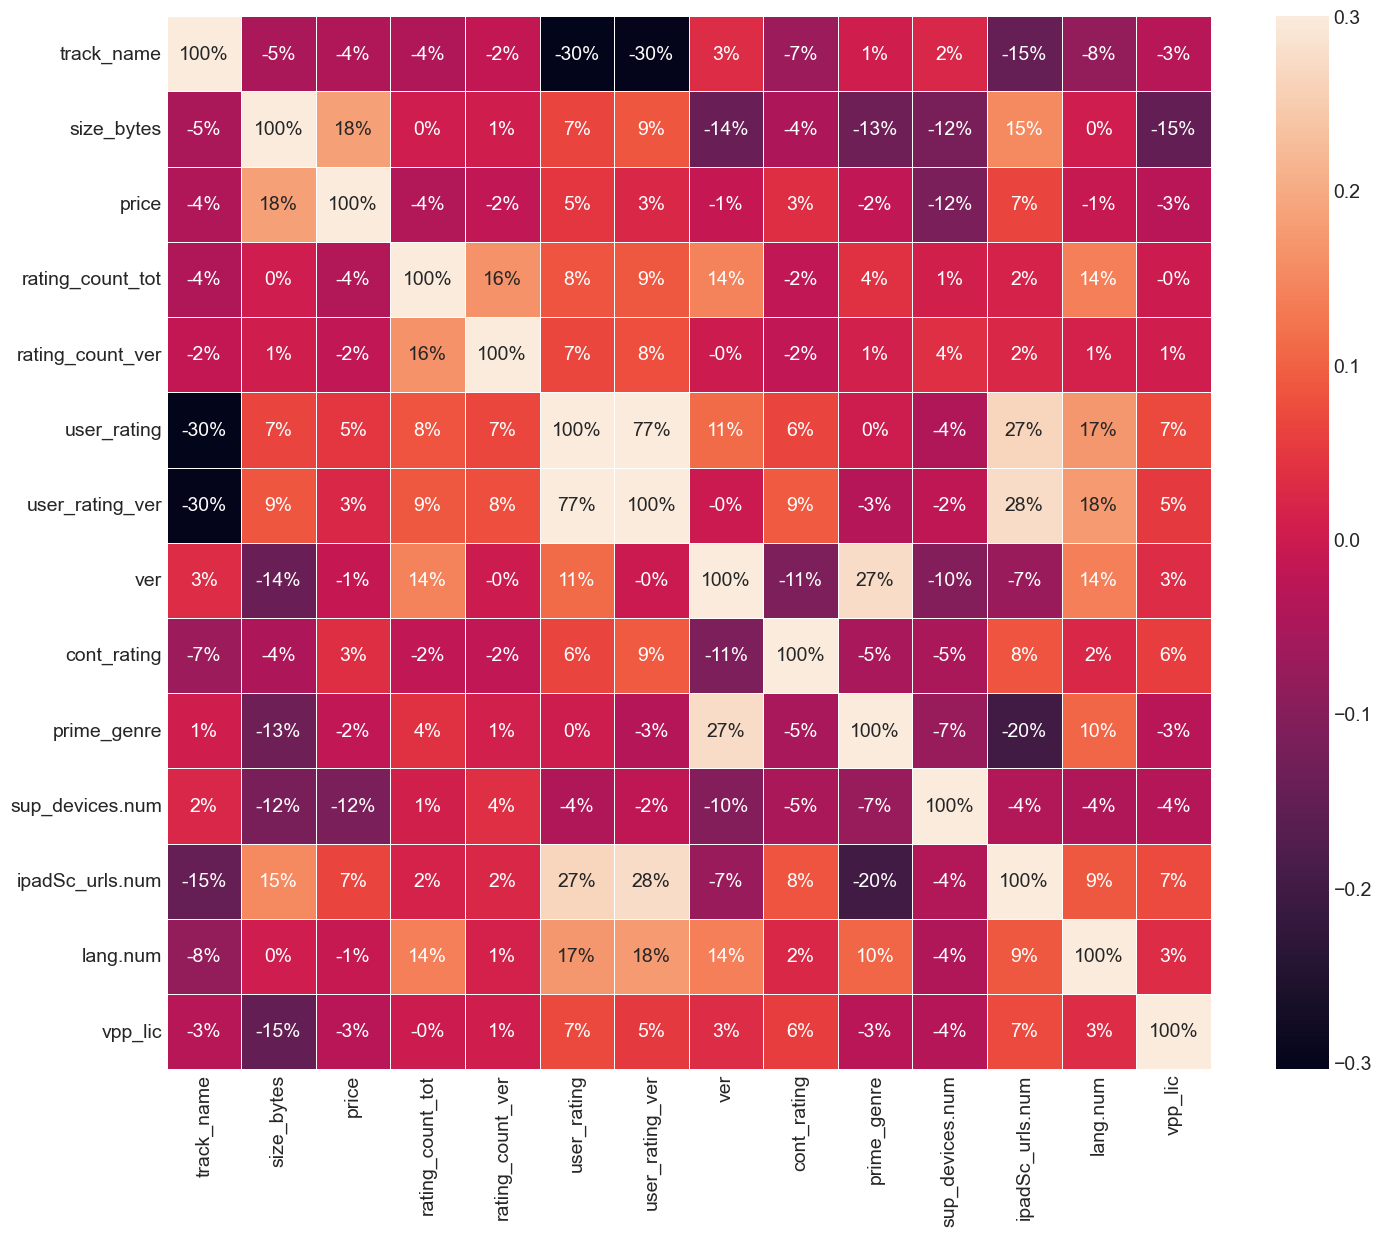

In [70]:
plt.figure(figsize=(15,13))
sns.heatmap(D_corr,annot=True,fmt="0.0%",vmax=0.3,square=False,linewidths=0.5)

## PPS (Predictive Power Score)

In [74]:
# Calculating ppscore
import ppscore as pps
c = pps.matrix(data)
c

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,track_name,track_name,1.0,predict_itself,True,None,0.000000e+00,1.000000e+00,None
1,track_name,size_bytes,0.0,regression,True,mean absolute error,1.507944e+08,2.034129e+08,DecisionTreeRegressor()
2,track_name,price,0.0,regression,True,mean absolute error,1.771204e+00,2.240976e+00,DecisionTreeRegressor()
3,track_name,rating_count_tot,0.0,regression,True,mean absolute error,1.216113e+04,2.047588e+04,DecisionTreeRegressor()
4,track_name,rating_count_ver,0.0,regression,True,mean absolute error,4.637924e+02,7.655062e+02,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
191,vpp_lic,prime_genre,0.0,regression,True,mean absolute error,2.912000e+00,3.623269e+00,DecisionTreeRegressor()
192,vpp_lic,sup_devices.num,0.0,regression,True,mean absolute error,1.827400e+00,1.836597e+00,DecisionTreeRegressor()
193,vpp_lic,ipadSc_urls.num,0.0,regression,True,mean absolute error,1.280600e+00,1.656586e+00,DecisionTreeRegressor()
194,vpp_lic,lang.num,0.0,regression,True,mean absolute error,4.398600e+00,5.489964e+00,DecisionTreeRegressor()


<AxesSubplot: xlabel='x', ylabel='y'>

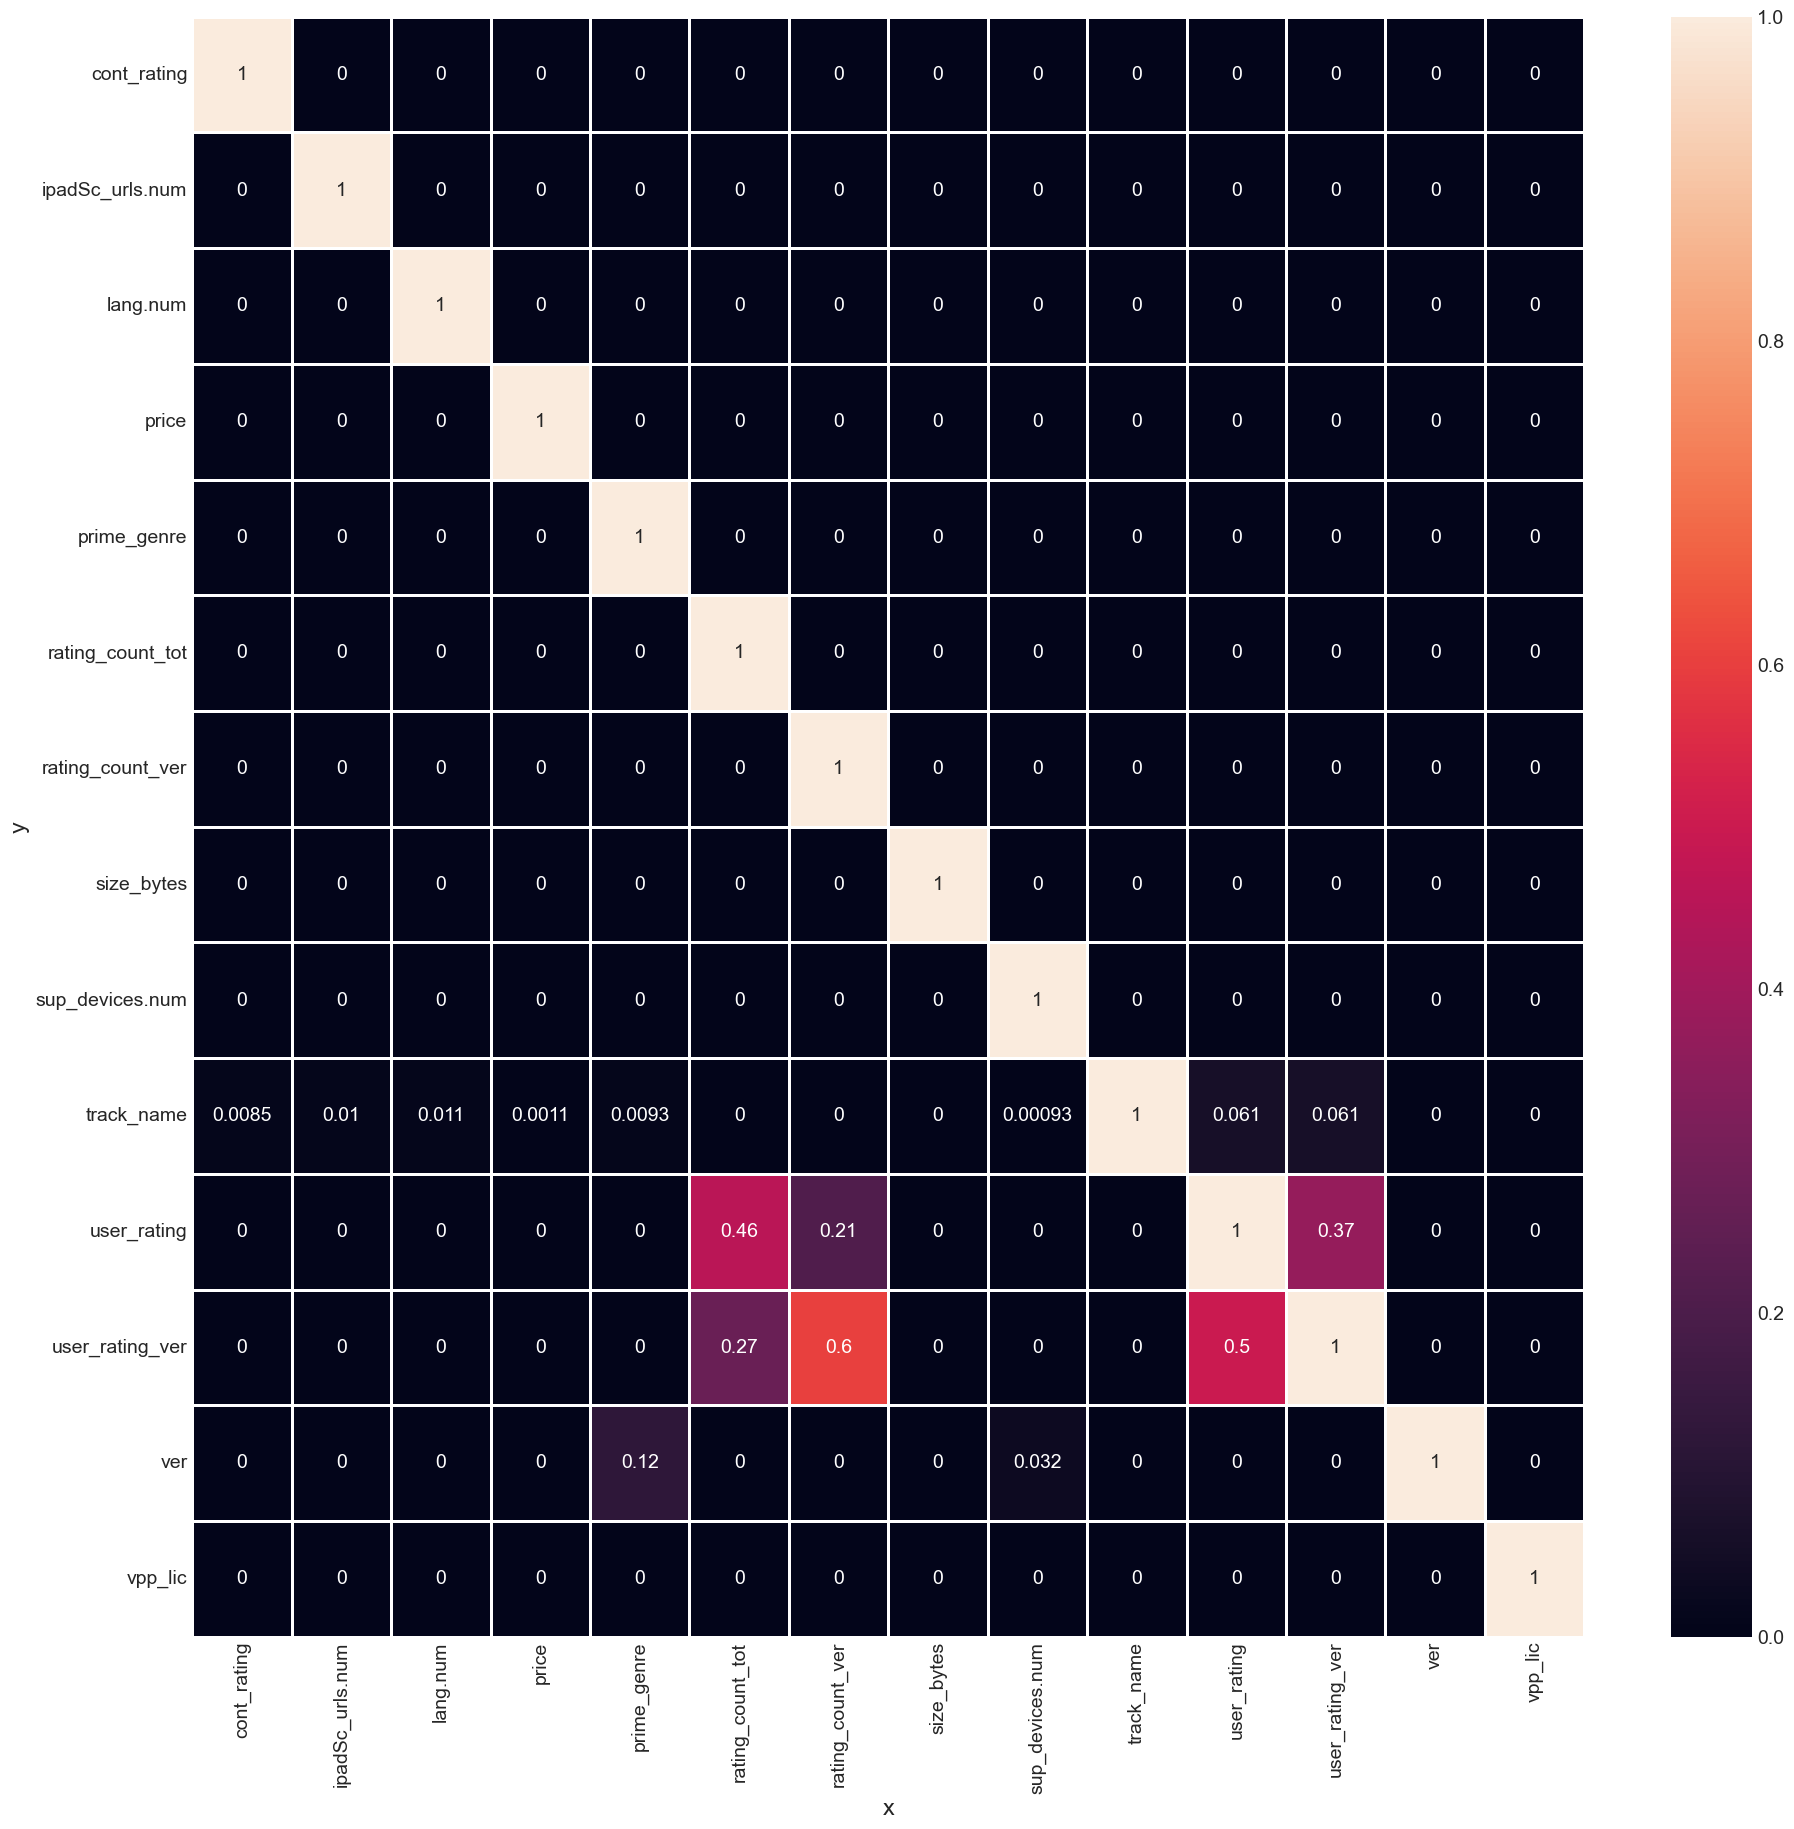

In [82]:
plt.figure(figsize=(20,20))
a = pps.matrix(data).pivot(columns='x',index='y',values='ppscore')
sns.heatmap(a,annot=True,linewidths=0.8)

<AxesSubplot: xlabel='x', ylabel='y'>

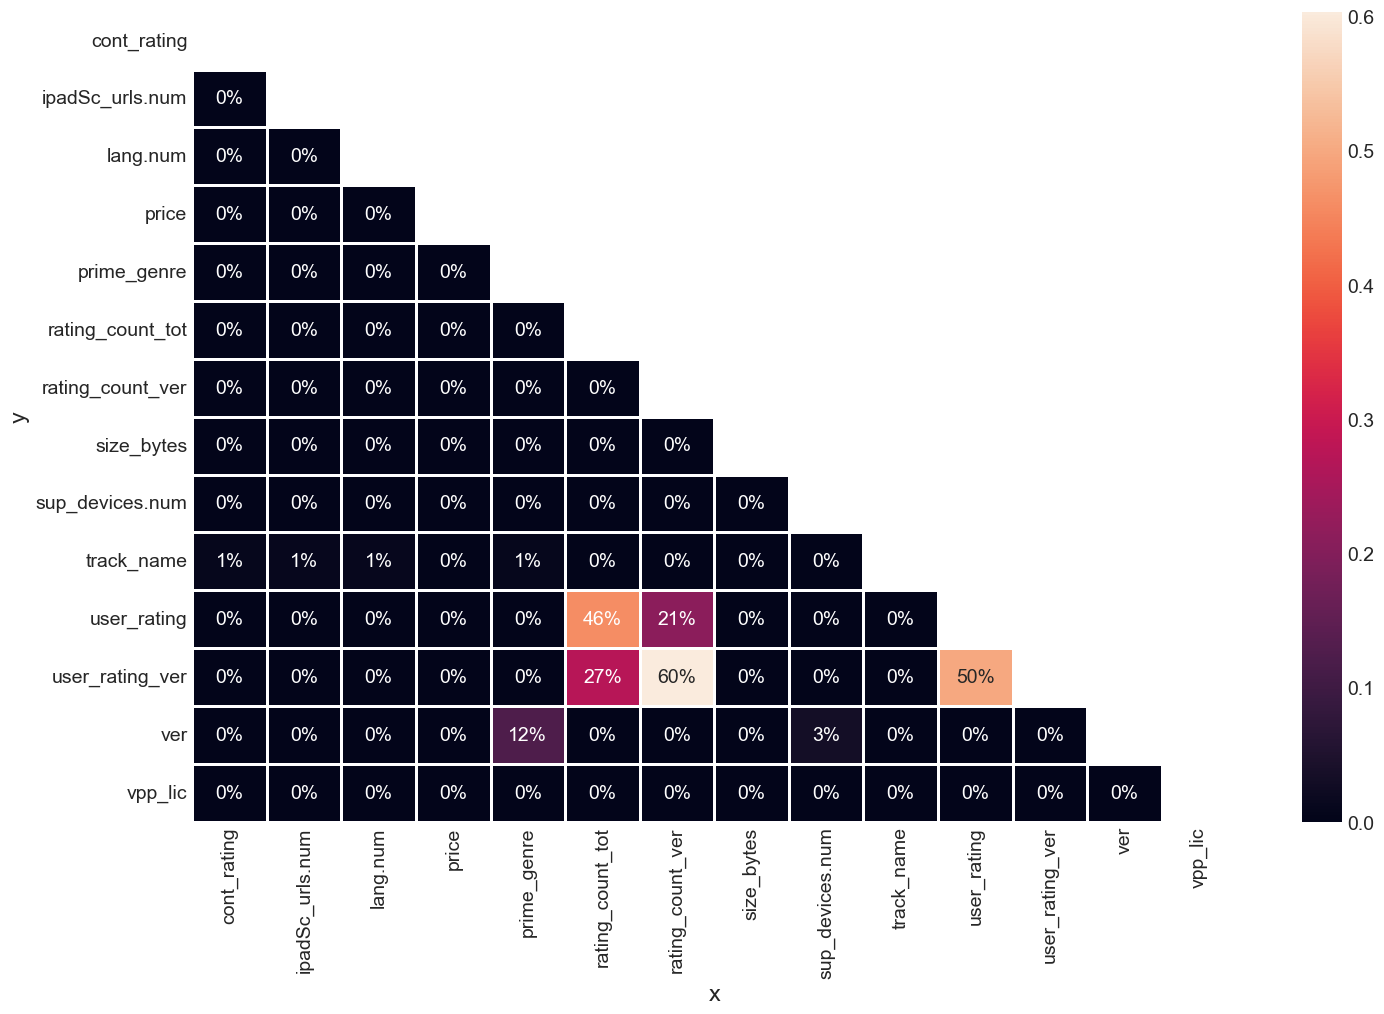

In [95]:
mask = np.zeros_like(a)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,10))
sns.heatmap(a,annot=True,linewidths=0.8,mask=mask,fmt='0.0%',square=False)

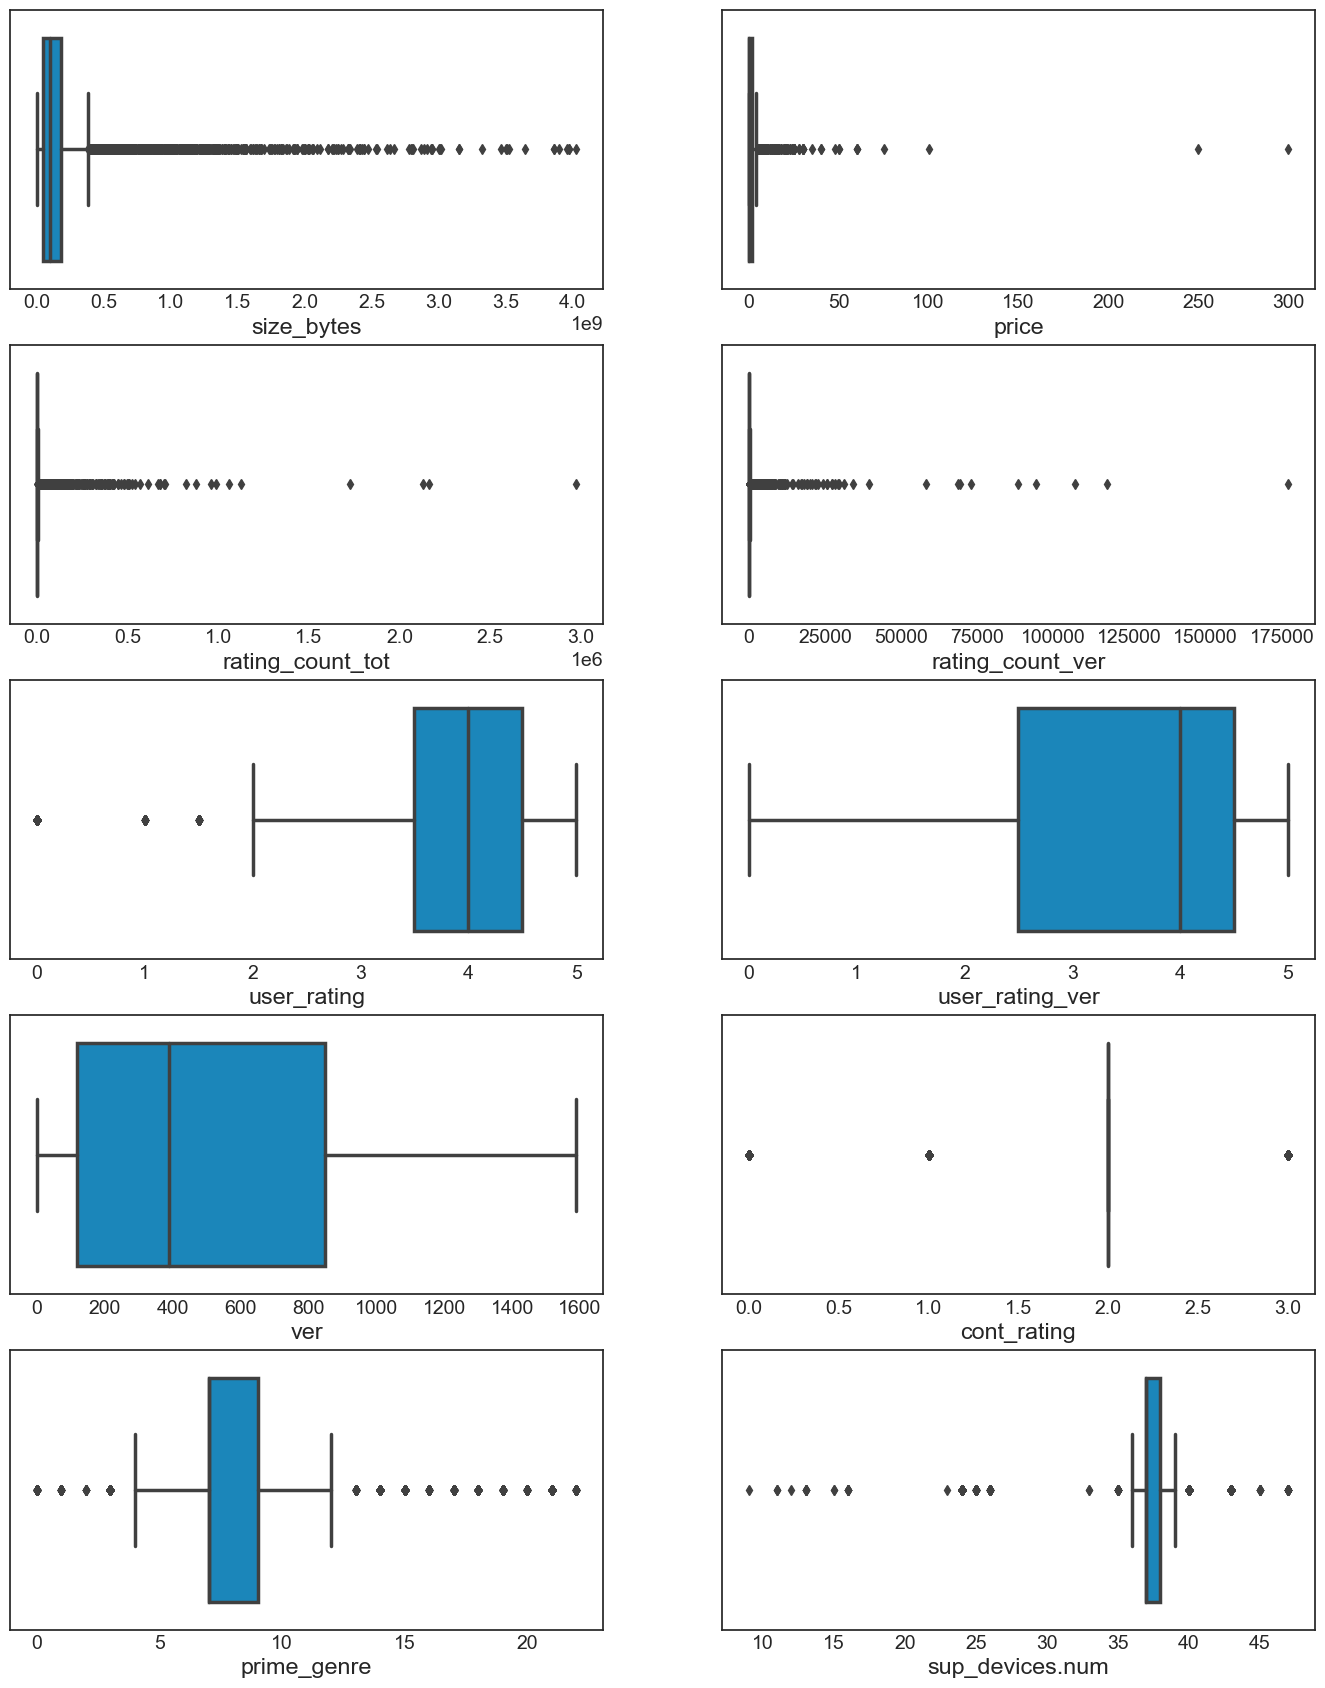

In [104]:
#Show outliers with boxplot
plt.figure(figsize = (15,20))
col_names = [ 'size_bytes', 'price', 'rating_count_tot',
       'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver',
       'cont_rating', 'prime_genre', 'sup_devices.num']
for i in range(10):
    plt.subplot(5,2,i+1) #5 number of row #2 number of columns
    sns.boxplot(x=data[col_names[i]], linewidth=2.5)
plt.show()